In [85]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import time

In [86]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gpt-35s-response/GPT 3.5 response on SentNoB test data.xlsx


In [87]:
df=pd.read_excel('/kaggle/input/gpt-35s-response/GPT 3.5 response on SentNoB test data.xlsx')
#df=df[:59]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Index                1586 non-null   float64
 1   Actual Sentiment     1586 non-null   float64
 2   Predicted Sentiment  1586 non-null   float64
 3   Text                 1586 non-null   object 
 4   ChatGPT response     1586 non-null   object 
dtypes: float64(3), object(2)
memory usage: 62.1+ KB


In [88]:
df.head()

,Index,Actual Sentiment,Predicted Sentiment,Text,ChatGPT response
0,0.0,0.0,0.0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক ব...",The sentiment of the given text is neutral. \n...
1,1.0,0.0,2.0,ভাইয়া নতুন ভিডিও আসে না কেন,"The sentiment of the text ""ভাইয়া নতুন ভিডিও আস..."
2,2.0,0.0,2.0,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,The sentiment of the given text is negative. \...
3,3.0,2.0,2.0,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,The sentiment of the text is negative. The wri...
4,4.0,1.0,1.0,আমিতো সেই ঝালপ্রিয়ো মানুষ,The sentiment of the text is positive. \n\nExp...


In [89]:
def sentiment_identifier(text):
    keywords = {
        'neutral': int(0),
        'Neutral': int(0),
        'positive': int(1),
        'Positive': int(1),
        'negative': int(2),
        'Negative': int(2),
        'offense': int(2)
    }
    positions = {keyword: text.find(keyword) for keyword in keywords}
    valid_positions = {key: pos for key, pos in positions.items() if pos != -1}
    if not valid_positions:
        return None
    first_keyword = min(valid_positions, key=valid_positions.get)
    return keywords[first_keyword]
text = "The sentiment of the given text is negative. The phrase 'অপকর্মের সাথে' (along with wrongdoing) sets a negative tone in the sentence and the overall sentiment is reinforced by the word 'পুলিশ জড়িত থাকবে' (police will be involved). The use of the word 'কমন' (common) at the end doesn't necessarily make the sentiment positive as it is used in a sarcastic or negative tone. Therefore, the overall sentiment of the sentence is negative as it highlights the inclusion of police in a wrongdoing."
result = sentiment_identifier(text)
print(result)

2


In [90]:
df['Predicted Sentiment'] = df['ChatGPT response'].apply(sentiment_identifier)

In [91]:
df.head()

,Index,Actual Sentiment,Predicted Sentiment,Text,ChatGPT response
0,0.0,0.0,0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক ব...",The sentiment of the given text is neutral. \n...
1,1.0,0.0,2,ভাইয়া নতুন ভিডিও আসে না কেন,"The sentiment of the text ""ভাইয়া নতুন ভিডিও আস..."
2,2.0,0.0,2,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,The sentiment of the given text is negative. \...
3,3.0,2.0,2,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,The sentiment of the text is negative. The wri...
4,4.0,1.0,1,আমিতো সেই ঝালপ্রিয়ো মানুষ,The sentiment of the text is positive. \n\nExp...


In [92]:
df.shape[0]

1586

In [93]:
df['Predicted Sentiment'].value_counts(), len(df)

(2    657
 0    522
 1    407
 Name: Predicted Sentiment, dtype: int64,
 1586)

In [94]:
nan_rows = df[df.isna().any(axis=1)].index.tolist()

print(nan_rows)

[]


In [95]:
accuracy = accuracy_score(df['Actual Sentiment'],df['Predicted Sentiment'])
print(f"Accuracy: {accuracy:.2%}")
precision= precision_score(df['Actual Sentiment'],df['Predicted Sentiment'],average='macro')
print(f"Precision: {precision:.2%}")
recall=recall_score(df['Actual Sentiment'],df['Predicted Sentiment'],average='macro')
print(f"Recall: {recall:.2%}")
f1=f1_score(df['Actual Sentiment'],df['Predicted Sentiment'],average='macro')
print(f"F1 score: {f1:.2%}")

Accuracy: 58.70%
Precision: 59.89%
Recall: 58.31%
F1 score: 57.32%


In [96]:
print(classification_report(df['Actual Sentiment'],df['Predicted Sentiment']))

              precision    recall  f1-score   support

         0.0       0.36      0.52      0.43       361
         1.0       0.80      0.50      0.62       654
         2.0       0.63      0.73      0.68       571

    accuracy                           0.59      1586
   macro avg       0.60      0.58      0.57      1586
weighted avg       0.64      0.59      0.60      1586



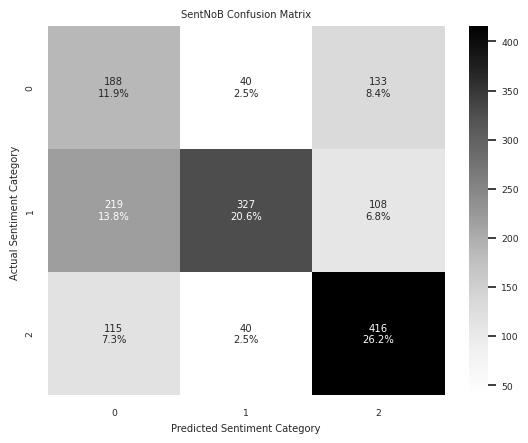

In [97]:
cf_matrix = confusion_matrix(df['Actual Sentiment'],df['Predicted Sentiment'])
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('SentNoB Confusion Matrix');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels([0,1,2])
ax.yaxis.set_ticklabels([0,1,2])
sns.set(color_codes=True)
sns.set(font_scale=.6)
plt.savefig('SentNoB GPT 3.5 predicted_label.png', bbox_inches = "tight")
plt.show()

In [98]:
df_output= sub_all=pd.DataFrame()
df_output['Actual Sentiment']= df['Actual Sentiment']
df_output['Predicted Sentiment']= df['Predicted Sentiment']
df_output['Text']=df['Text'].tolist()
df_output['ChatGPT response']= df['ChatGPT response']
df_output.to_csv('SentNoB GPT 3.5.csv', index=True)